# Семинар 3: работа с таблицами в pandas

## Вступление
Сегодня мы начнём работать с табличными данными в питоне, и в этом нам поможет библиотека pandas. Pandas — это самый популярный инструмент для работы с данными. Цель семинара — познакомить вас с основными конструкциями pandas и научить им пользоваться.

Почему pandas удобный?
1.	Удобное представление таблиц и куча готовых методов, как работать с этими таблицами
2.	Простота использования
3.	Наличие встроенных визуализаций
4.	Наличие всех функций из excel (и даже больше)
5.	Универсальность инструмента, можно читать почти все табличные типы данных
6.	Хорошо подходит для экспериментов с данными

А почему он неудобный?
1.	Медленный
2.	Чаще всего нельзя использовать в проде из-за скорости
3.	Иногда сложно интерпретировать код, написанный на pandas

### План семинара
1. Работаем с датасетом оценок студентов
2. Работаем с датасетом пассажиров Титаника

### Дополнительные материалы

[Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

[10 Minutes To Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)

[Pandas CookBook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. Работаем с датасетом оценок студентов

Pandas предоставляет нам много различных инструментов работы с табличными данными. Главные из них — это: класс таблицы `pandas.core.frame.DataFrame` и его методы; класс серии данных (например, столбец таблицы) `pandas.core.series.Series` и его методы; и различные функции библиотеки. 

Начнём с подгрузки таблицы из файла и посмотрим на методы класса `DataFrame`.

In [1]:
df = pd.read_csv("grades.csv", sep=",", index_col=0)
type(df)

NameError: name 'pd' is not defined

In [3]:
# размер таблицы
df.shape

(38, 10)

In [4]:
# вывести начало таблицы
df.head(5)

,hash,0,1,2,3,4,5,6,7,8
0,cbe32a2a1b,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,caa93590ad,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0
2,5bbe47f96d,0.8,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0
3,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
4,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# вывести конец таблицы
df.tail()

,hash,0,1,2,3,4,5,6,7,8
33,c11c124eb9,0.0,1.0,1.0,0.8,0.5,0.5,0.0,0.0,0.7
34,8b4c1af94b,0.8,1.0,1.0,1.0,0.5,0.0,0.5,0.0,0.7
35,e1388f2aae,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,ee55242421,0.8,1.0,0.0,0.7,0.0,1.0,0.0,0.9,0.0
37,d6c40a7f4b,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# выбрать случайные строки
df.sample(n=5)

,hash,0,1,2,3,4,5,6,7,8
18,5a0a06b184,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
14,a2d96fe1d4,0.0,0.7,1.0,1.0,0.0,0.0,0.0,0.0,0.0
17,bae2523189,0.8,1.0,0.5,1.0,0.5,0.5,0.5,0.0,0.6
7,99fe117fcb,0.8,0.0,1.0,0.9,1.0,1.0,0.5,0.0,0.0
21,b7235befa9,0.8,1.0,1.0,1.0,0.5,0.0,0.5,0.0,0.7


In [7]:
# выбрать случайные строки 2
df.sample(frac=0.3)

,hash,0,1,2,3,4,5,6,7,8
9,1eea619f12,0.8,1.0,0.0,0.2,0.5,0.2,0.0,0.0,0.2
28,b8132ed8db,0.8,1.0,1.0,1.0,0.5,0.0,0.5,0.0,0.0
33,c11c124eb9,0.0,1.0,1.0,0.8,0.5,0.5,0.0,0.0,0.7
25,cb9dfc5d66,0.8,1.0,1.0,1.0,0.5,0.2,0.5,0.9,0.7
30,403978747a,0.8,1.0,1.0,1.0,0.5,0.0,0.5,0.0,0.7
16,426dfedb85,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0
37,d6c40a7f4b,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,e342391d26,0.0,0.8,0.0,0.7,0.5,0.0,0.0,0.0,0.0
5,7ca01c996f,0.5,0.8,0.5,0.5,0.0,0.0,0.0,0.0,0.0
26,d7955cb7bc,0.0,0.7,1.0,1.0,0.0,0.5,0.0,0.0,0.0


Добавим работу со столбцами: датафрейм можно индексировать квадратными скобками с названиями столбцов. Столбец будет экземпляром класса `pandas.core.series.Series`.

In [8]:
col0 = df["0"]
col0

0     0.8
1     0.2
2     0.8
3     0.0
4     0.0
5     0.5
6     0.9
7     0.8
8     0.0
9     0.8
10    1.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.2
16    0.2
17    0.8
18    0.0
19    0.0
20    0.0
21    0.8
22    0.8
23    0.8
24    0.8
25    0.8
26    0.0
27    0.0
28    0.8
29    0.5
30    0.8
31    0.8
32    0.0
33    0.0
34    0.8
35    0.0
36    0.8
37    0.0
Name: 0, dtype: float64

In [9]:
type(col0)

pandas.core.series.Series

In [10]:
# выбрать 5 строк с наибольшими значениями в столбцах '3', '4'
df.nlargest(n=5, columns=["3", "4"])

,hash,0,1,2,3,4,5,6,7,8
0,cbe32a2a1b,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5bbe47f96d,0.8,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0
15,7174532c74,0.2,0.9,1.0,1.0,1.0,0.0,0.0,0.0,0.0
20,6588f97aea,0.0,0.6,1.0,1.0,1.0,0.5,0.0,0.0,0.7
6,2a5a018502,0.9,1.0,1.0,1.0,0.8,0.0,0.5,0.0,0.7


In [11]:
# подсчитать количество уникальных значений в столбце 3
df["3"].nunique()

7

In [12]:
# подсчитать, сколько раз встретилось в столбце '3' каждое уникальное значение
df["3"].value_counts()

1.0    20
0.0     8
0.7     4
0.5     3
0.9     1
0.2     1
0.8     1
Name: 3, dtype: int64

Доступ к столбцу можно получить не только через квадратные скобки, но и через точку, по аналогии с атрибутом класса.

In [13]:
df["hash"]

0     cbe32a2a1b
1     caa93590ad
2     5bbe47f96d
3     3f187965b9
4     bf1e56e185
5     7ca01c996f
6     2a5a018502
7     99fe117fcb
8     6875ba52f0
9     1eea619f12
10    f9f854aa44
11    6346ddfdb5
12    b5c2ae4623
13    15360bcc4c
14    a2d96fe1d4
15    7174532c74
16    426dfedb85
17    bae2523189
18    5a0a06b184
19    789d9f4f97
20    6588f97aea
21    b7235befa9
22    ca49cc7265
23    6134e7ea6f
24    8f67295cb3
25    cb9dfc5d66
26    d7955cb7bc
27    237fe82b6f
28    b8132ed8db
29    80a4f796b4
30    403978747a
31    33979cb9cb
32    e342391d26
33    c11c124eb9
34    8b4c1af94b
35    e1388f2aae
36    ee55242421
37    d6c40a7f4b
Name: hash, dtype: object

In [14]:
df.hash

0     cbe32a2a1b
1     caa93590ad
2     5bbe47f96d
3     3f187965b9
4     bf1e56e185
5     7ca01c996f
6     2a5a018502
7     99fe117fcb
8     6875ba52f0
9     1eea619f12
10    f9f854aa44
11    6346ddfdb5
12    b5c2ae4623
13    15360bcc4c
14    a2d96fe1d4
15    7174532c74
16    426dfedb85
17    bae2523189
18    5a0a06b184
19    789d9f4f97
20    6588f97aea
21    b7235befa9
22    ca49cc7265
23    6134e7ea6f
24    8f67295cb3
25    cb9dfc5d66
26    d7955cb7bc
27    237fe82b6f
28    b8132ed8db
29    80a4f796b4
30    403978747a
31    33979cb9cb
32    e342391d26
33    c11c124eb9
34    8b4c1af94b
35    e1388f2aae
36    ee55242421
37    d6c40a7f4b
Name: hash, dtype: object

А вот доступ к строкам можно получить при помощи `.iloc` и `loc`. Внешне они выглядят одинаково, но отличаются в деталях: первый индексирует по номеру строки, а второй — по индексирующему столбцу. Мы вернёмся к этому ниже, когда будет говорить про данные пассажиров Титаника. Обратите внимание, что такая индексация возвращает новый объект класса `DataFrame`.

In [15]:
df.iloc[:5]

,hash,0,1,2,3,4,5,6,7,8
0,cbe32a2a1b,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,caa93590ad,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0
2,5bbe47f96d,0.8,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0
3,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
4,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# склеить две таблицы по строкам
df1 = df.iloc[:5]
df2 = df.iloc[10:15]
pd.concat([df1, df2])

,hash,0,1,2,3,4,5,6,7,8
0,cbe32a2a1b,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,caa93590ad,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0
2,5bbe47f96d,0.8,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0
3,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
4,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,f9f854aa44,1.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
11,6346ddfdb5,0.0,1.0,1.0,0.0,0.5,0.0,0.5,0.0,0.7
12,b5c2ae4623,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.6
13,15360bcc4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,a2d96fe1d4,0.0,0.7,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# склеить две таблицы по столбцам
df1 = df[["hash", "1"]]
df2 = df[["3", "4"]]
pd.concat([df1, df2], axis=1).head()

,hash,1,3,4
0,cbe32a2a1b,1.0,1.0,1.0
1,caa93590ad,0.2,0.7,0.0
2,5bbe47f96d,1.0,1.0,1.0
3,3f187965b9,0.0,1.0,0.5
4,bf1e56e185,0.0,0.0,0.0


Метод `DataFrame.merge` объединяет таблицы по переданному столбцу (аналог SQL: JOIN).

In [18]:
# таблица с оценками
df_grades = pd.read_csv("grades.csv", index_col=0)
df_grades.head()

,hash,0,1,2,3,4,5,6,7,8
0,cbe32a2a1b,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,caa93590ad,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0
2,5bbe47f96d,0.8,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0
3,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
4,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_hashes = pd.read_csv("hashes.csv")
df_hashes.head()

,Группа,Фамилия,Имя,Отчество,hash
0,БПМ-161,Антонов,Алексей,Алексеевич,6875ba52f0
1,БПМ-161,Арсамакова,Алина,Ибрагимовна,7ca01c996f
2,БПМ-161,Богатов,Антон,Юрьевич,15360bcc4c
3,БПМ-161,Бычков,Андрей,-,f9f854aa44
4,БПМ-161,Высоцкий,Яков,Михайлович,1d1d05c257


Не для всех студентов известны оценки!

In [20]:
df_grades.hash.nunique(), df_hashes.hash.nunique()

(38, 95)

In [21]:
# присоединить подходящие строки из df_grades к df_hashes
df = pd.merge(df_hashes, df_grades, on="hash", how="left")
print(df.shape)
df.head(10)

(95, 14)


,Группа,Фамилия,Имя,Отчество,hash,0,1,2,3,4,5,6,7,8
0,БПМ-161,Антонов,Алексей,Алексеевич,6875ba52f0,0.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
1,БПМ-161,Арсамакова,Алина,Ибрагимовна,7ca01c996f,0.5,0.8,0.5,0.5,0.0,0.0,0.0,0.0,0.0
2,БПМ-161,Богатов,Антон,Юрьевич,15360bcc4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,БПМ-161,Бычков,Андрей,-,f9f854aa44,1.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
4,БПМ-161,Высоцкий,Яков,Михайлович,1d1d05c257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,БПМ-161,Галигеров,Владислав,Сергеевич,738b683ed7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,БПМ-161,Гончаров,Глеб,Игоревич,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
7,БПМ-161,Городилов,Илья,Игоревич,6df2f31eb9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,БПМ-161,Дудинов,Тимур,Батырович,e1388f2aae,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,БПМ-161,Иванов,Артём,Владиславович,a2d96fe1d4,0.0,0.7,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# присоединить подходящие строки из df_hashes к df_grades
df = pd.merge(df_hashes, df_grades, on="hash", how="right")
print(df.shape)
df.head(10)

(38, 14)


,Группа,Фамилия,Имя,Отчество,hash,0,1,2,3,4,5,6,7,8
0,БПМ-162,Сучков,Даниил,Викторович,cbe32a2a1b,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,БПМ-161,Хмельницкий,Даниил,Анатольевич,caa93590ad,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0
2,БПМ-162,Углов,Егор,Алексеевич,5bbe47f96d,0.8,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0
3,БПМ-161,Гончаров,Глеб,Игоревич,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
4,БПМ-161,Мартынов,Никита,Игоревич,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,БПМ-161,Арсамакова,Алина,Ибрагимовна,7ca01c996f,0.5,0.8,0.5,0.5,0.0,0.0,0.0,0.0,0.0
6,БПМ-162,Островский,Всеволод,Петрович,2a5a018502,0.9,1.0,1.0,1.0,0.8,0.0,0.5,0.0,0.7
7,БПМ-162,Борисычев,Александр,Сергеевич,99fe117fcb,0.8,0.0,1.0,0.9,1.0,1.0,0.5,0.0,0.0
8,БПМ-161,Антонов,Алексей,Алексеевич,6875ba52f0,0.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
9,БПМ-162,Лисицына,Анастасия,Сергеевна,1eea619f12,0.8,1.0,0.0,0.2,0.5,0.2,0.0,0.0,0.2


In [23]:
# пересечение таблиц
# в данном случае эквивалентно 'right', т.к. в df_grades нет таких хэшей, которые отсутствуют в df_hashes
df = pd.merge(df_hashes, df_grades, on="hash", how="inner")
print(df.shape)
df.head(10)

(38, 14)


,Группа,Фамилия,Имя,Отчество,hash,0,1,2,3,4,5,6,7,8
0,БПМ-161,Антонов,Алексей,Алексеевич,6875ba52f0,0.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
1,БПМ-161,Арсамакова,Алина,Ибрагимовна,7ca01c996f,0.5,0.8,0.5,0.5,0.0,0.0,0.0,0.0,0.0
2,БПМ-161,Богатов,Антон,Юрьевич,15360bcc4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,БПМ-161,Бычков,Андрей,-,f9f854aa44,1.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
4,БПМ-161,Гончаров,Глеб,Игоревич,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
5,БПМ-161,Дудинов,Тимур,Батырович,e1388f2aae,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,БПМ-161,Иванов,Артём,Владиславович,a2d96fe1d4,0.0,0.7,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,БПМ-161,Кубышкина,Екатерина,Константиновна,6588f97aea,0.0,0.6,1.0,1.0,1.0,0.5,0.0,0.0,0.7
8,БПМ-161,Мартынов,Никита,Игоревич,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,БПМ-161,Плешко,Георгий,Дмитриевич,5a0a06b184,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# объединение таблиц
# в данном случае эквивалентно 'left', т.к. в df_grades нет таких хэшей, которые отсутствуют в df_hashes
df = pd.merge(df_hashes, df_grades, on="hash", how="outer")
print(df.shape)
df.head(10)

(95, 14)


,Группа,Фамилия,Имя,Отчество,hash,0,1,2,3,4,5,6,7,8
0,БПМ-161,Антонов,Алексей,Алексеевич,6875ba52f0,0.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
1,БПМ-161,Арсамакова,Алина,Ибрагимовна,7ca01c996f,0.5,0.8,0.5,0.5,0.0,0.0,0.0,0.0,0.0
2,БПМ-161,Богатов,Антон,Юрьевич,15360bcc4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,БПМ-161,Бычков,Андрей,-,f9f854aa44,1.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
4,БПМ-161,Высоцкий,Яков,Михайлович,1d1d05c257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,БПМ-161,Галигеров,Владислав,Сергеевич,738b683ed7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,БПМ-161,Гончаров,Глеб,Игоревич,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
7,БПМ-161,Городилов,Илья,Игоревич,6df2f31eb9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,БПМ-161,Дудинов,Тимур,Батырович,e1388f2aae,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,БПМ-161,Иванов,Артём,Владиславович,a2d96fe1d4,0.0,0.7,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# выбрать из таблицы хэшей только те строки, в которых хэш есть в таблице оценок
# т.е. отобрать тех студентов, которые писали контрольную и были оценены
df = df_hashes[df_hashes.hash.isin(df_grades.hash)]
print(df.shape)
df.head()

(38, 5)


,Группа,Фамилия,Имя,Отчество,hash
0,БПМ-161,Антонов,Алексей,Алексеевич,6875ba52f0
1,БПМ-161,Арсамакова,Алина,Ибрагимовна,7ca01c996f
2,БПМ-161,Богатов,Антон,Юрьевич,15360bcc4c
3,БПМ-161,Бычков,Андрей,-,f9f854aa44
6,БПМ-161,Гончаров,Глеб,Игоревич,3f187965b9


In [26]:
# сколько человек из каждой группы были оценены?
df.Группа.value_counts()

БПМ-161    18
БПМ-162    18
БПМ-163     2
Name: Группа, dtype: int64

In [27]:
type(df)

pandas.core.frame.DataFrame

In [28]:
type(df["Группа"])

pandas.core.series.Series

Метод `DataFrame.groupby` делает группировку строк по значениям в каком-то столбце, чтобы мы могли их усреднить/просуммировать/etc. Например, если бы у нас была таблица вида [студент - предмет - оценка], то мы могли бы сгруппировать строки по столбцу предмета и посчитать по каждому предмету среднюю оценку.

In [29]:
# сгруппировать строки по столбцу '1'
gr = df_grades.groupby(by="1")
gr

In [30]:
df_grades.head()

,hash,0,1,2,3,4,5,6,7,8
0,cbe32a2a1b,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,caa93590ad,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0
2,5bbe47f96d,0.8,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0
3,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
4,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_grades["1"].nunique()

8

In [32]:
# какая средняя оценка (и ее дисперсия) за другие задачи у студентов, получивших конкретную оценку по задаче '1'?

In [33]:
gr.mean()

,0,2,3,4,5,6,7,8
1,,,,,,,,
0.0,0.133333,0.466667,0.483333,0.250000,0.166667,0.083333,0.000000,0.000000
0.2,0.300000,0.933333,0.800000,0.166667,0.066667,0.166667,0.000000,0.066667
0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.6,0.000000,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.700000
0.7,0.000000,1.000000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000
0.8,0.250000,0.250000,0.600000,0.250000,0.000000,0.000000,0.000000,0.000000
0.9,0.500000,0.250000,0.500000,0.625000,0.125000,0.000000,0.250000,0.150000
1.0,0.594737,0.789474,0.773684,0.463158,0.252632,0.289474,0.094737,0.442105


In [34]:
# дисперсия
gr.var()

,0,2,3,4,5,6,7,8
1,,,,,,,,
0.0,0.106667,0.266667,0.281667,0.175000,0.166667,0.041667,0.000000,0.000000
0.2,0.030000,0.003333,0.030000,0.083333,0.013333,0.083333,0.000000,0.013333
0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.7,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000
0.8,0.125000,0.125000,0.020000,0.125000,0.000000,0.000000,0.000000,0.000000
0.9,0.226667,0.250000,0.166667,0.062500,0.062500,0.000000,0.250000,0.090000
1.0,0.133860,0.140994,0.155380,0.086901,0.135965,0.064327,0.080526,0.108129


In [35]:
# откуда взялись NaN?

In [36]:
gr.get_group(0.2)

,hash,0,1,2,3,4,5,6,7,8
1,caa93590ad,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0
16,426dfedb85,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0
29,80a4f796b4,0.5,0.2,1.0,1.0,0.5,0.2,0.5,0.0,0.2


## 2. Работаем с датасетом пассажиров Титаника

Каждая строчка наборов данных содержит следующие поля:

- Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

- Name — имя;

- Sex — пол;

- Age — возраст;

- SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту Титаника;

- Parch — количество родителей, детей (в том числе приемных) на борту Титаника;

- Ticket — номер билета;

- Fare — плата за проезд;

- Cabin — каюта;

- Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон)

- Survived - пассажир выжил или нет.

В поле Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

In [37]:
df = pd.read_csv("titanic_train.csv", sep=",")

In [38]:
# типы данных
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [39]:
# сравним, сколько места занимает столбец
df["SibSp"].astype("int64").memory_usage()

7256

In [40]:
df["SibSp"].astype("int8").memory_usage()

1019

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Для первичного анализа полезно посмотреть на базовые статистики численных переменных. Для этого есть готовый метод:

In [42]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Также полезно проверить, какие переменные коррелированы больше, а какие — меньше.

In [43]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [46]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [47]:
Y = df["Survived"]
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [48]:
df[["Survived", "Age"]].head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [49]:
# удаление данных одного из столбцов
X = df[df.columns.drop("Survived")]

In [50]:
X = df.drop("Survived", axis=1)  # same thing as previous cell

In [51]:
df.shape, X.shape, Y.shape

((891, 12), (891, 11), (891,))

Обещанная индексация! Давайте сперва проиндексируем таблицу двумя способами через `iloc` и `loc`, а затем изменим индексирующий столбец и посмотри на разницу.

In [52]:
X.iloc[[5, 8, 10]]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [53]:
X.loc[[5, 8, 10]]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [54]:
# Меняем индексацию!
df_new = df.set_index("Name")
df_new.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
df_new.loc["Braund, Mr. Owen Harris"]

PassengerId            1
Survived               0
Pclass                 3
Sex                 male
Age                 22.0
SibSp                  1
Parch                  0
Ticket         A/5 21171
Fare                7.25
Cabin                NaN
Embarked               S
Name: Braund, Mr. Owen Harris, dtype: object

### Анализ данных

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
set(df["Sex"])

{'female', 'male'}

In [58]:
len(set(df["Name"]))

891

In [59]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

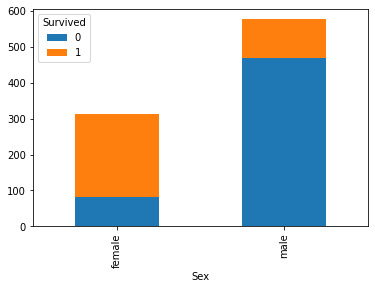

In [60]:
df.pivot_table("PassengerId", "Sex", "Survived", "count").plot(kind="bar", stacked=True);
# Какой вывод из полученных гистограмм?

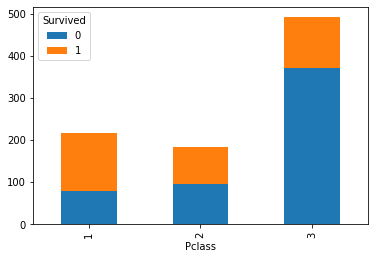

In [61]:
df.pivot_table("PassengerId", "Pclass", "Survived", "count").plot(
    kind="bar", stacked=True
);
# Какой вывод из полученных гистограмм?

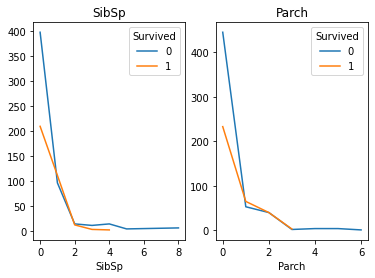

In [62]:
fig, axes = plt.subplots(ncols=2)
df.pivot_table("PassengerId", ["SibSp"], "Survived", "count").plot(
    ax=axes[0], title="SibSp"
)
df.pivot_table("PassengerId", ["Parch"], "Survived", "count").plot(
    ax=axes[1], title="Parch"
);

# Какой вывод из полученных графиков?

<AxesSubplot:xlabel='PassengerId'>

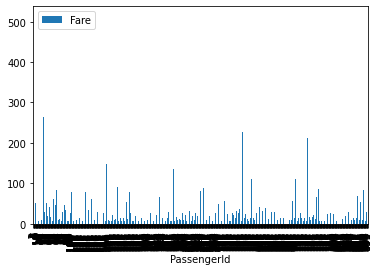

In [63]:
df.plot(x="PassengerId", y="Fare", kind="bar")

### Обработка и преобразование данных

In [64]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [65]:
# преобразуем текстовый признак "Пол" в числовые значения
df["DecodedSex"] = df["Sex"].map({"male": 1, "female": -1, "unknown": 0})
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DecodedSex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,-1


In [66]:
# добавим еще одну характеристику для каждого объекта датасета
def fun(age):
    return age / 100


df["NewAge"] = df["Age"].apply(fun)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DecodedSex,NewAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,-1,0.38


In [67]:
# то же самое можно сделать с помощью лямбда функции
df["NewAge"] = df["Age"].apply(lambda age: age / 100)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DecodedSex,NewAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,-1,0.38


In [68]:
df["NewAge"] = df["Age"] / 100
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DecodedSex,NewAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,-1,0.38


**Важно!** Pandas, как и NumPy, является лишь обёрткой на питоне для вычислительно эффективных операций над большими данными. Любое использование циклов в pandas приводит к неэффективности кода. Методы `.apply` и `.map` **медленные**, потому что внутри в цикле применяют питоновскую функцию к элементам таблицы. Старайтесь всегда использовать более эффективные реализации (например, арифметические операторы над столбцами) и прибегать к `.apply` и `.map` только в крайнем случае!

In [69]:
%%timeit
df["NewAge"] = df["Age"].apply(lambda age: age / 100)

726 µs ± 63.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [70]:
%%timeit
df["NewAge"] = df["Age"] / 100

264 µs ± 5.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [71]:
# выделим фамилию из данных
df["Surname"] = df["Name"].apply(lambda name: name.split(",")[0])  # option1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DecodedSex,NewAge,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.22,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,-1,0.38,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-1,0.26,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,-1,0.35,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0.35,Allen


In [72]:
df.shape

(891, 15)

In [73]:
df.Surname.nunique()

667

In [74]:
df["Surname"] = df["Name"].apply(lambda name: name[: name.find(",")])  # option 2

In [75]:
df["Surname"].value_counts().head()

Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
Name: Surname, dtype: int64

In [76]:
df.values  # df -> numpy.array

array([[1, 0, 3, ..., 1, 0.22, 'Braund'],
       [2, 1, 1, ..., -1, 0.38, 'Cumings'],
       [3, 1, 3, ..., -1, 0.26, 'Heikkinen'],
       ...,
       [889, 0, 3, ..., -1, nan, 'Johnston'],
       [890, 1, 1, ..., 1, 0.26, 'Behr'],
       [891, 0, 3, ..., 1, 0.32, 'Dooley']], dtype=object)

In [77]:
# Исследуем возраст пассажиров Титаника
df.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [78]:
# опять же, обращаем внимание на эффективное использование pandas
%timeit df.groupby("Sex")["Age"].mean()

764 µs ± 3.21 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [79]:
%timeit df.groupby("Sex")["Age"].apply(np.mean)

1.39 ms ± 3.28 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [80]:
df.groupby("Sex")["Age"].apply(lambda ages: np.mean(ages) ** 2)

Sex
female    779.286798
male      944.126688
Name: Age, dtype: float64

In [81]:
df.groupby("Survived")["Age"].apply(np.mean)

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [82]:
# группировка по нескольким столбцам и агрегация нескольких полей сразу
df.groupby(["Sex", "Pclass"]).agg(avg=("Age", "mean"), avg_surv=("Survived", "mean"))

avg  avg_surv
Sex    Pclass                     
female 1       34.611765  0.968085
       2       28.722973  0.921053
       3       21.750000  0.500000
male   1       41.281386  0.368852
       2       30.740707  0.157407
       3       26.507589  0.135447

In [83]:
# .mean -> .count
# В скольких семьях было больше трёх человек?
np.sum(df.groupby("Surname")["Name"].count() > 3)

22

In [84]:
# Сколько семей, в которых минимальный возраст меньше 10 лет?
np.sum(df.groupby("Surname")["Age"].apply(min) < 10)

37

Снова про индексацию! Как и в numpy, можно индексировать значения булевыми масками.

In [85]:
((df["Age"] > 10) & (df["Age"] < 20)).value_counts()

False    791
True     100
Name: Age, dtype: int64

In [86]:
# пассажиры, удовлетворяющие условию
df.loc[(df["Age"] > 10) & (df["Age"] < 20)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DecodedSex,NewAge,Surname
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,-1,0.14,Nasser
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,-1,0.14,Vestrom
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,-1,0.15,McGowan
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,1,0.19,Fortune
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S,-1,0.18,Vander Planke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S,-1,0.16,Lines
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,-1,0.18,Aks
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,-1,0.15,Najib
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S,1,0.19,Petroff
